# 04.6 Classification - Random Forest

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("04-classification-data.csv")
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
# take all the rows, take all the columns except the last column one
X = df.iloc[:, :-1].values # will contains the values of the columns 'R&D Spend', 'Administration', 'Marketing Spend', 'State'
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [4]:
# take all the rows, take only the last column
y = df.iloc[:, -1].values # will contains the values of the columns 'Profit'
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  X, y,
  test_size = 0.25,
  random_state = 0,
  stratify=y
)

print(f"total X_train {len(X_train)}")
print(f"total y_train {len(y_train)}")
print(f"total X_test {len(X_test)}")
print(f"total y_test {len(y_test)}")

# compare the means of both y_train and y_test to confirm the stratification
print(f"mean y_train: {np.mean(y_train):.3f}")
print(f"mean y_test:  {np.mean(y_test):.3f}")

total X_train 300
total y_train 300
total X_test 100
total y_test 100
mean y_train: 0.357
mean y_test:  0.360


## Classification

In [6]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# generic function
# -> allow no other code change in the other cells
# ---> across the classification notebooks
def do_predict(X_input):
  y_pred = classifier.predict(X_input)
  return y_pred

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = do_predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f" -> did not purchase prediction")
print(f"   -> correct   {cm[0][0]}")
print(f"   -> incorrect {cm[1][0]}")
print(f" -> did purchase prediction")
print(f"   -> correct   {cm[1][1]}")
print(f"   -> incorrect {cm[0][1]}")

score = accuracy_score(y_test, y_pred)
print(f"score: {score}")

[[56  8]
 [ 6 30]]
 -> did not purchase prediction
   -> correct   56
   -> incorrect 6
 -> did purchase prediction
   -> correct   30
   -> incorrect 8
score: 0.86


## Visualizing
(easier since only 2 inputs)

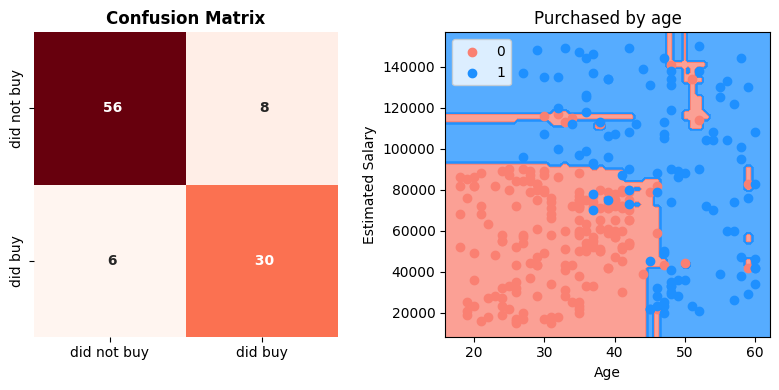

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
color_map = ListedColormap(['#FA8072', '#1E90FF'])

def make_axis(min_val, max_val):
  gap = (max_val - min_val) * 0.05
  return np.linspace(min_val - gap, max_val + gap, num=100),

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(
  make_axis(X_set[:, 0].min(), X_set[:, 0].max()),
  make_axis(X_set[:, 1].min(), X_set[:, 1].max())
)
raw_data = np.array([X1.ravel(), X2.ravel()]).T

nrows = 1
ncols = 2
plt.subplots(nrows, ncols, figsize = (ncols*4,nrows*4))

# left
plt.subplot(nrows, ncols, 1)
labels = ['did not buy', 'did buy']
sns.heatmap(
  cm, cmap = 'Reds', annot = True, annot_kws = {'fontweight':'bold'},
  fmt = " ", square = True, cbar = False,
  xticklabels = labels, yticklabels = labels
)
plt.title("Confusion Matrix", fontsize = 12, fontweight = "bold", color = "black")

# right
plt.subplot(nrows, ncols, 2)
plt.contourf(
  X1, X2,
  do_predict(raw_data).reshape(X1.shape),
  alpha = 0.75, cmap = color_map
)
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = color_map(i), label = j)
plt.title('Purchased by age')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

# sub-plots should not overlap
plt.tight_layout()
